In [1]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import statistics

In [2]:
df = pd.read_csv('churn_clean.csv')

In [3]:
df

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,149.948316,271.493436,4,4,4,3,4,4,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M324793,45deb5a2-ae04-4518-bf0b-c82db8dbe4a4,9499fb4de537af195d16d046b79fd20a,Mount Holly,VT,Rutland,5758,43.43391,-72.78734,...,159.979400,6511.252601,3,2,3,3,4,3,2,3
9996,9997,D861732,6e96b921-0c09-4993-bbda-a1ac6411061a,c09a841117fa81b5c8e19afec2760104,Clarksville,TN,Montgomery,37042,36.56907,-87.41694,...,207.481100,5695.951810,4,5,5,4,4,5,2,5
9997,9998,I243405,e8307ddf-9a01-4fff-bc59-4742e03fd24f,9c41f212d1e04dca84445019bbc9b41c,Mobeetie,TX,Wheeler,79061,35.52039,-100.44180,...,169.974100,4159.305799,4,4,4,4,4,4,4,5
9998,9999,I641617,3775ccfc-0052-4107-81ae-9657f81ecdf3,3e1f269b40c235a1038863ecf6b7a0df,Carrollton,GA,Carroll,30117,33.58016,-85.13241,...,252.624000,6468.456752,4,4,6,4,3,3,5,4


In [4]:
df['Churn'].replace({'No':0, 'Yes':1}, inplace=True)

A)
    1. Which features and variables are best to help determine which customer is at high risk of churning?
    2. stakeholders will benefit from this narrowing the variability of which customer possibly churning 
    3. churn column, monthly charge, tenure, 8 survey questions( timely response, timely fixes, timely replacements, reliability, options, respectful response, courteous exchange, evidence of active listening)


In [5]:
# B1) Chi-square

contingency= pd.crosstab(df['Churn'], df['Item1'])
contingency

Item1,1,2,3,4,5,6,7
Churn,,,,,,,
0,158,1002,2562,2473,994,146,15
1,66,391,886,885,365,53,4


In [6]:
contingency_pct= pd.crosstab(df['Churn'],df['Item1'], normalize='index')
contingency_pct

Item1,1,2,3,4,5,6,7
Churn,,,,,,,
0,0.021497,0.136327,0.348571,0.336463,0.135238,0.019864,0.002041
1,0.024906,0.147547,0.334340,0.333962,0.137736,0.020000,0.001509


<AxesSubplot:xlabel='Item1', ylabel='Churn'>

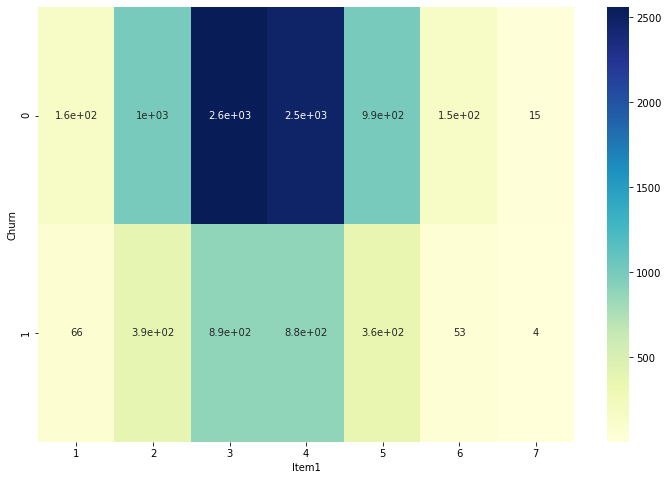

In [7]:
plt.figure(figsize=(12,8))
sns.heatmap(contingency, annot=True, cmap="YlGnBu")

In [8]:
# B2)
c,p, dof, expected = chi2_contingency(contingency)
print(p)

0.6318335816054494


In [9]:
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
        print('Dependent (reject H0)')
else:
        print('Independent (H0 holds true)')

p value is 0.6318335816054494
Independent (H0 holds true)


In [ ]:
corr = df.corr()
plt.figure(figsize=(25,20))
sns.heatmap(corr, cmap='Blues_r', annot=True)

<AxesSubplot:>

 B3)
 Chi-square was chosen for the analysis of determining which customers are likely to churn using categorical variables. The 'Churn' column which is binomial and 'Item1' for timely responses were used to test for independence. 
 


C) Univariate
Continuous variables:
    -MonthlyCharge
    -Outage_sec_perweek
Categorical Variables:
    -Item1
    -Item3

# C1)
df.describe()

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.hist(df['Item1'])

In [ ]:
plt.hist(df['Item3'])

In [ ]:
plt.hist(df['MonthlyCharge'])

In [ ]:
plt.hist(df['Outage_sec_perweek'])

In [ ]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df["MonthlyCharge"])

In [ ]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df["Item1"])

In [ ]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df["Item3"])

In [ ]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df["Outage_sec_perweek"])

D) Bivariate
Continuous Variables:
    -Outage_sec_perweek
    -Bandwidth_GB_Year
Categorical Variable
    -Item1
    -Item3

In [ ]:
# D1)
churn_bivariate = df[['Outage_sec_perweek', 'Bandwidth_GB_Year', 'Item1', 'Item3']]
sns.heatmap(churn_bivariate.corr(), annot=True)
plt.show()

In [ ]:
churn_bivariate[churn_bivariate['Outage_sec_perweek'] < 22].sample(100).plot.scatter(x='Outage_sec_perweek', 
                                                                                     y='Bandwidth_GB_Year')

In [ ]:
churn_bivariate[churn_bivariate['Item1'] < 10].sample(100).plot.scatter(x='Item1', 
                                                                        y='Item3')

In [ ]:
pd.set_option('display.max_rows', df.shape[0]+1)
df[['State','Gender','Churn']].groupby(['State','Gender']).agg(['mean','count'])

In [ ]:
df[['Churn','MonthlyCharge']].groupby('Churn').mean()

In [ ]:
df[['Gender','Churn']].groupby(['Gender']).agg(['mean','count'])

E)
    1) After performing the chi-square test it was found that the p-value = 0.6318335816054494 and with a 0.05 alpha level we fail to reject the null. Meaning that customer churn and customer survey for item1 is independent of each other.
    2) Based on looking at the correlation heatmap we can see that there is not a big correlation between customer churn and the variables. Among all the variables there is not big correlation with each other, thus the data stuck at providing meaningful insights. 
    3) From our analysis we may need to look more closely with the monthly charge for customers as well as access the survey questions. The survey variables show a small correlation among each other, and the monthly charge show a small correlation among churn rates.  

F) Panopto Video

G) Third-party references
    1)